In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import wisardpkg as wp

from load_cifar10 import load_cifar_10_data

from tools import evaluation, filter_data, flatten, print_images

def data_augmentation(data, labels):
    data_augmented = list(data)
    labels_augmented = list(labels)
    for index in range(0, len(data)):
        image_transformed = cv2.flip(data[index], 1)
        data_augmented.append(image_transformed)
        labels_augmented.append(labels[index])
    return data_augmented, labels_augmented

In [ ]:
cifar_10_dir = 'cifar-10-batches-py'

train_data, train_labels, test_data, test_labels, label_names = load_cifar_10_data(cifar_10_dir)
train_data, train_labels = data_augmentation(train_data, train_labels)

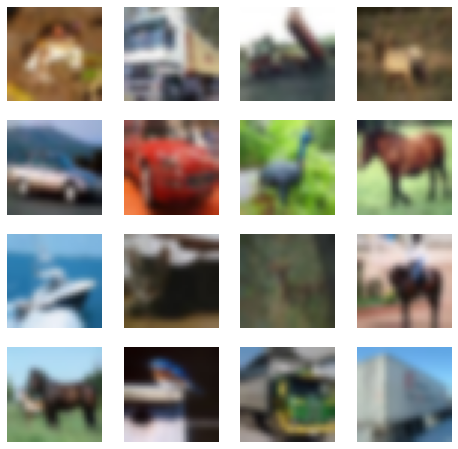

In [8]:
# Converting labels from int to string
train_labels = [str(label) for label in train_labels]
test_labels = [str(label) for label in test_labels]

train_data = [cv2.GaussianBlur(image, (5, 5), 0) for image in train_data]
test_data = [cv2.GaussianBlur(image, (5, 5), 0) for image in test_data]
print_images(train_data)

In [9]:
X_train = [flatten(sample) for sample in train_data]
X_test = [flatten(sample) for sample in test_data]

threshold = 115
X_train = np.where(np.array(X_train) > threshold, 1, 0)
X_test = np.where(np.array(X_test) > threshold, 1, 0)

In [10]:
addressSize = 15
ignoreZero = False

model = wp.Wisard(addressSize, ignoreZero=ignoreZero, verbose=True)

# Training
model.train(X_train, train_labels)

# Testing
out = model.classify(X_test)

# Evaluation
evaluation(out, test_labels)

Acc: 0.4107
